# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science/UT Certification Course/Week 5: Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

(1898, 9)

#### Observations: There are 1898 rows, and 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: "rating" has been recorded as string. "food_preparation_time" and "delivery_time" have been rounded to the nearest integer.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum amount of time for food to be prepared is 20 minutes. The average amount of time for food to be prepared is 27.37 minutes. The maximum amount of time for food to be prepared is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 736 of the 1898 total orders did not receive a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
df['order_id'].nunique()

1898

In [10]:
df['customer_id'].nunique()

1200

In [11]:
df['restaurant_name'].nunique()

178

In [12]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [13]:
df['cuisine_type'].nunique()

14

In [14]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

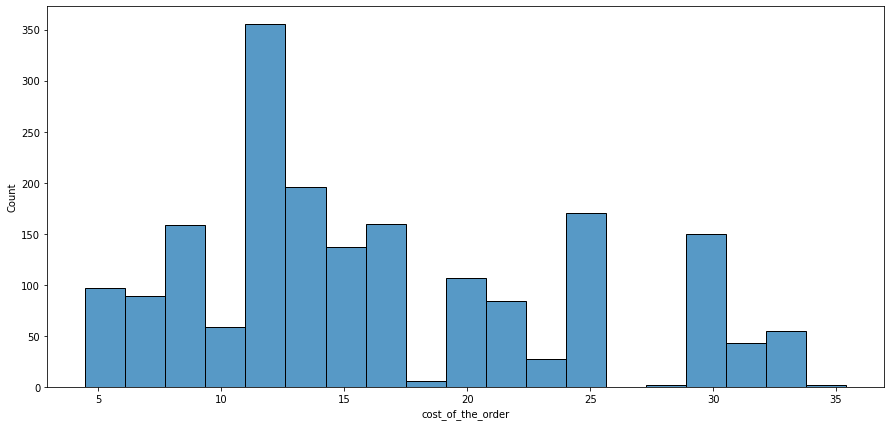

In [15]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='cost_of_the_order');

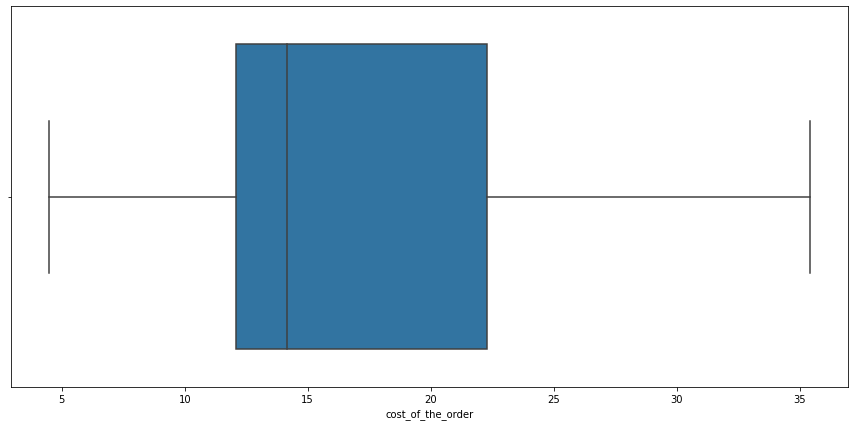

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cost_of_the_order');

### Observations: The cost per order is slightly right-skewed, with a median cost of 14 dollars. Half of all orders cost between 12 and 22 dollars. The lowest order was about 5 dollars. The highest order amount was about 35 dollars.

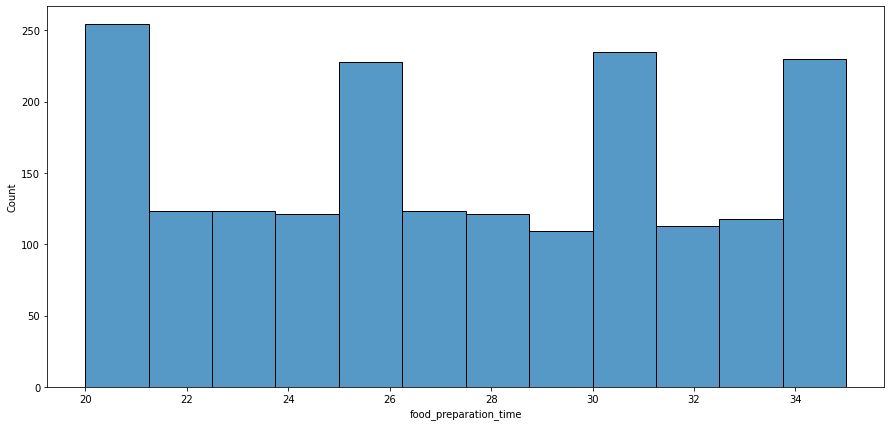

In [17]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='food_preparation_time');

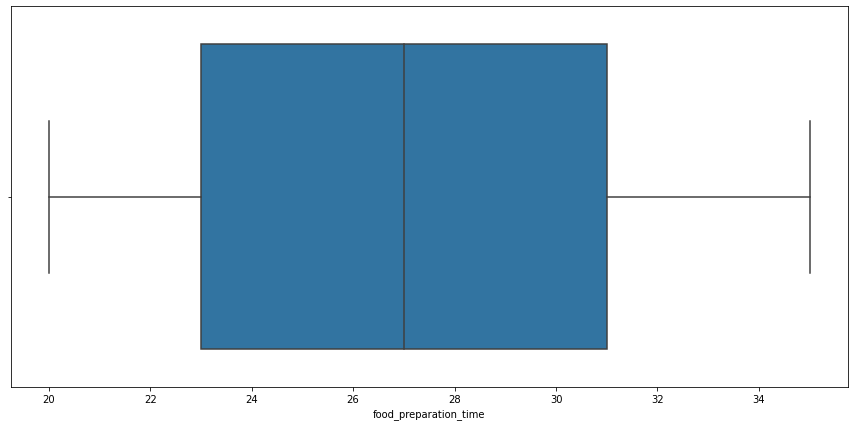

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='food_preparation_time');

### Observations: The food preparation time is evenly distributed. The median preparation time is 27 minutes. The fastest preparation time was 20 minutes. The slowest preparation time was 35 minutes.

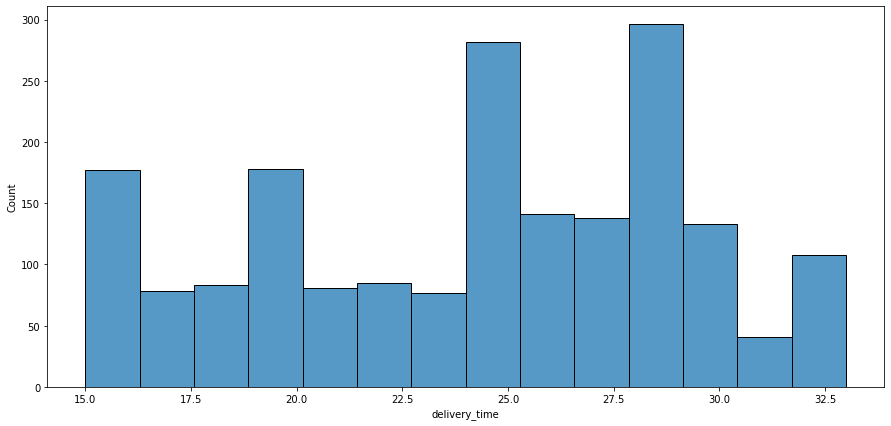

In [19]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='delivery_time');

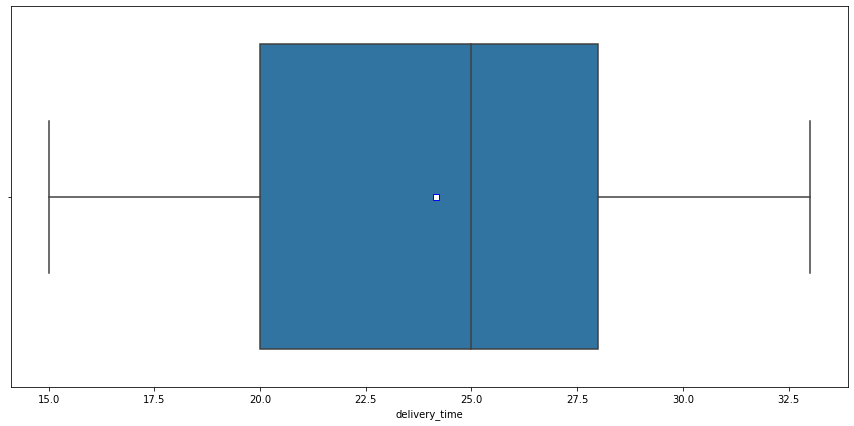

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='delivery_time', showmeans = True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"});

### Observations: Delivery time is slightly left-skewed, with the median delivery time at 25 minutes. The fastest delivery time was 15 minutes. The slowest delivery time was 33 minutes.

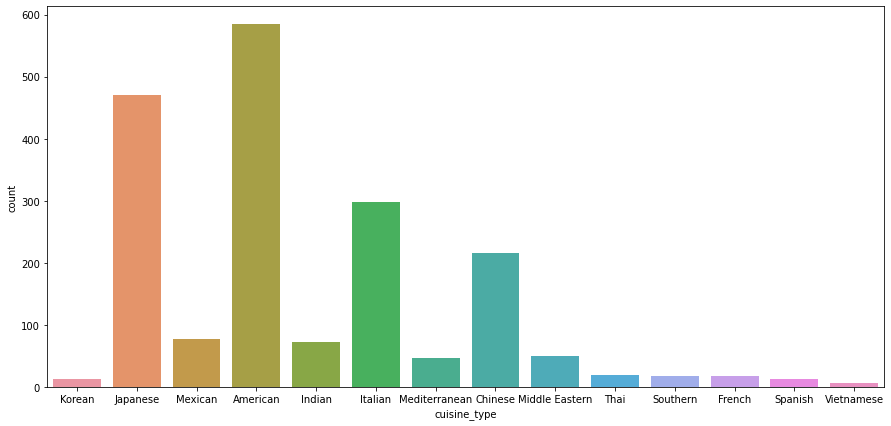

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type');

### Observations: There are 14 cuisine types in total. American, Japanese, Italian, and Chinese cuisines are the most dominant.

In [22]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

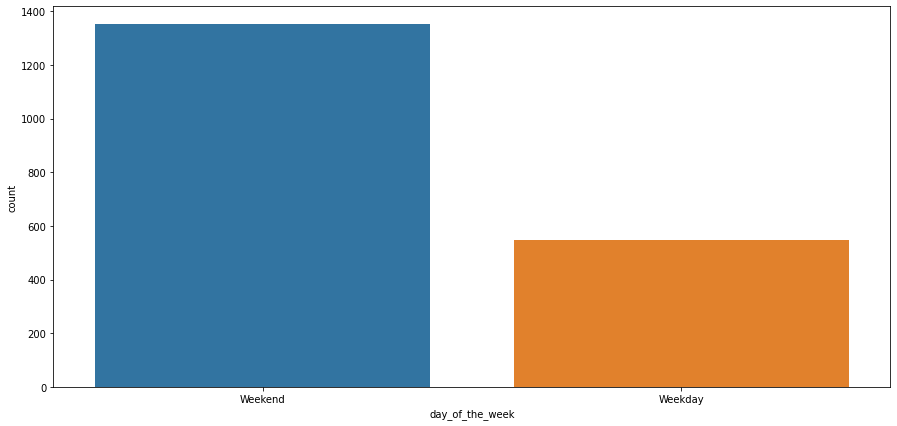

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='day_of_the_week');

### Observations: More than twice the amount of orders are placed using the service on weekends than on weekdays.

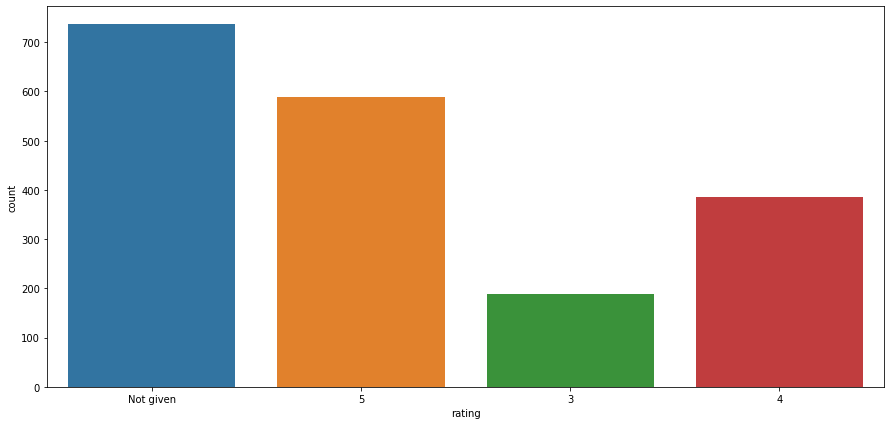

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='rating');

### Observations: About 40 percent of users choose not to give a rating. Of the users who give ratings, about 52 percent gave a rating of 5, 35 percent gave a rating of 4, and 17 percent gave a rating of 3.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The 5 restaurants with the most orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Friend Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [27]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations: The most popular cuisine on weekends is American, followed closely by Japanese.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
cost_above_20 = df[(df['cost_of_the_order']>20)].value_counts()
cost_above_20.value_counts()
555/1898

0.2924130663856691

#### Observations: 29.24 percent of all orders cost more than 20 dollars.


In [29]:
### MENTOR ANSWER
print(cost_above_20.shape[0])
percentage = (cost_above_20.shape[0] / df.shape[0]) * 100
percentage

555


29.24130663856691

### **Question 10**: What is the mean order delivery time? [1 mark]

In [30]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: The average delivery time was 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations: The top 3 customers are 52832 (13 orders), 47440 (10 orders), and 83287 (9 orders).


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


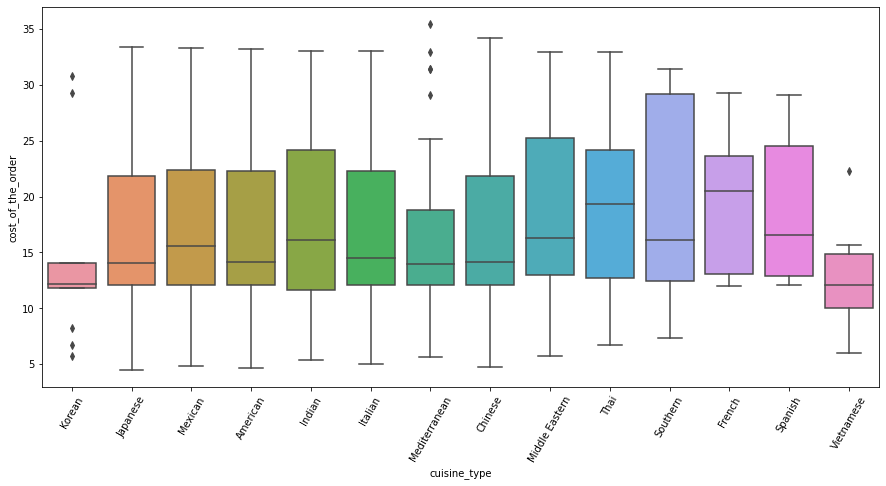

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 60)
plt.show();

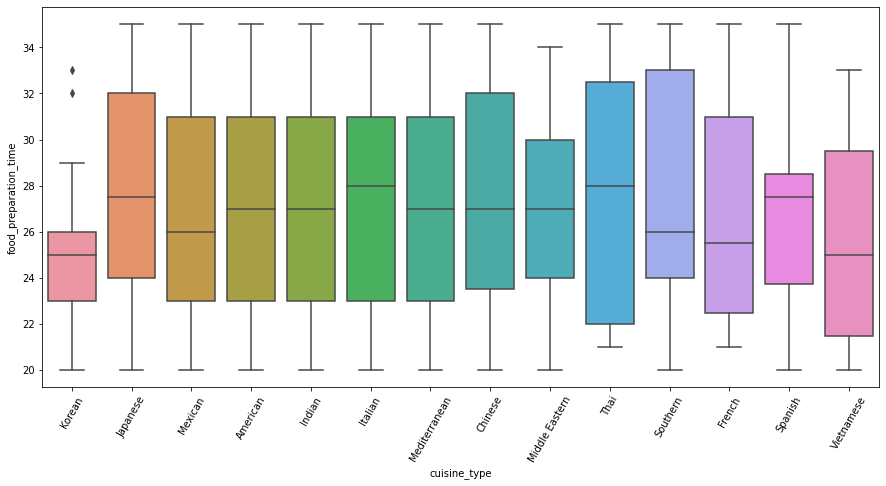

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation = 60)
plt.show();

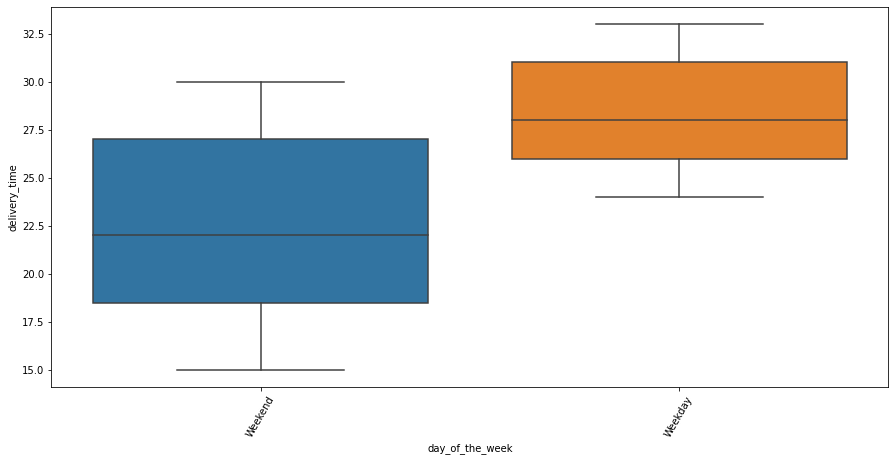

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
plt.xticks(rotation = 60)
plt.show();

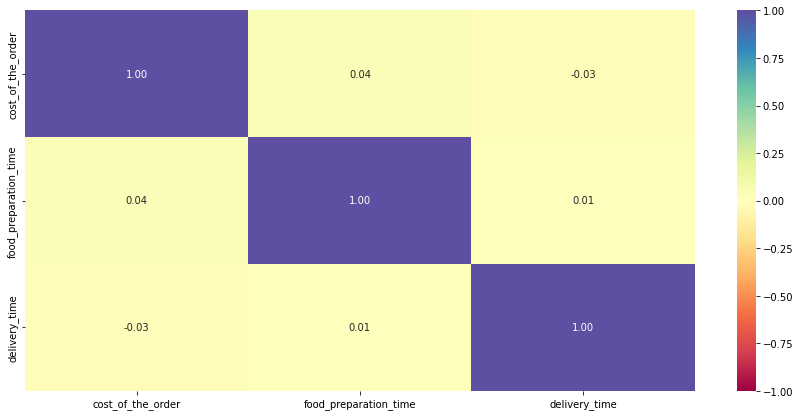

In [ ]:
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

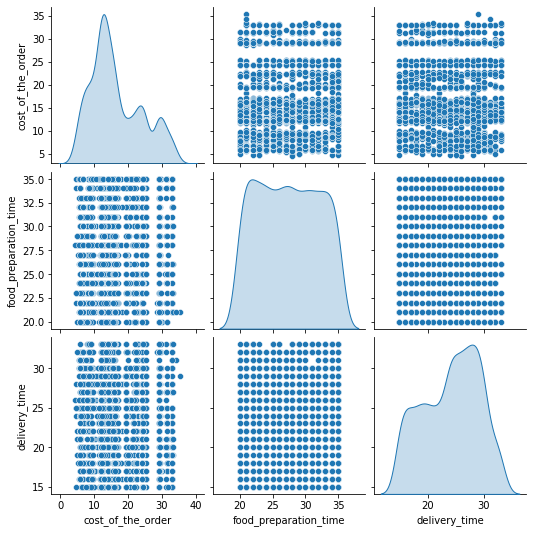

In [ ]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

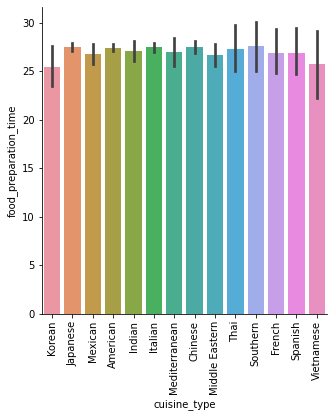

In [ ]:
sns.catplot(x='cuisine_type', y='food_preparation_time', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show();

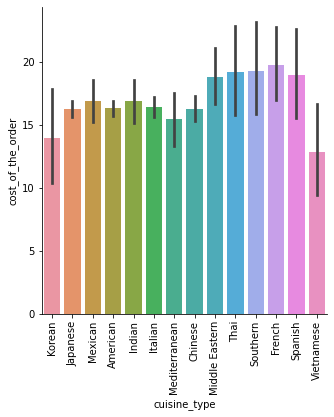

In [ ]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show();

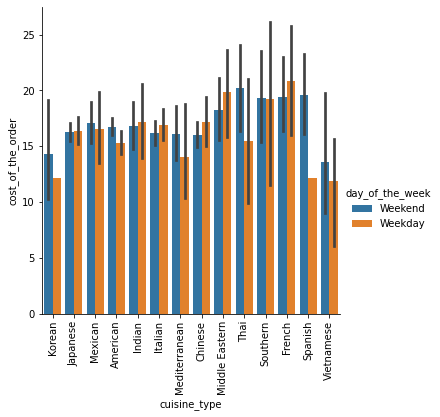

In [ ]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

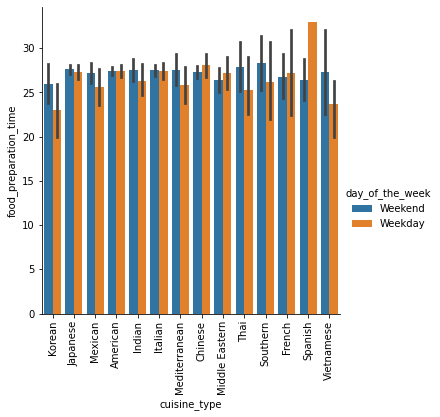

In [ ]:
sns.catplot(x='cuisine_type', y='food_preparation_time', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

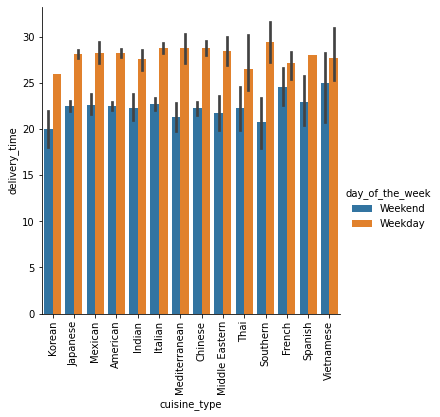

In [ ]:
sns.catplot(x='cuisine_type', y='delivery_time', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

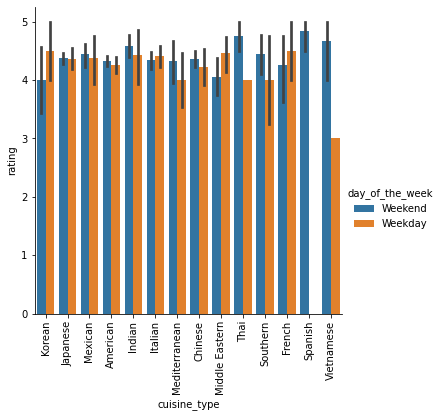

In [ ]:
sns.catplot(x='cuisine_type', y='rating', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

### Observations:
- Korean and Vietnamese food are the cheapest and fastest to prepare.
- Vietnamese food tends to have a wider preparation time range on the weekend.
- Spanish food takes MUCH longer to prepare during the week.
- Spanish, French, Southern, Thai, and Middle Eastern are generally more expensive than other cuisine types, except for Spanish food during the week.
- Orders are generally higher in total cost and preparation time on the weekend.
- Delivery time is about 5 minutes more during the week.
- Ratings for Vietnamese, Thai, and Southern are quite a bit lower during the week.

In [35]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

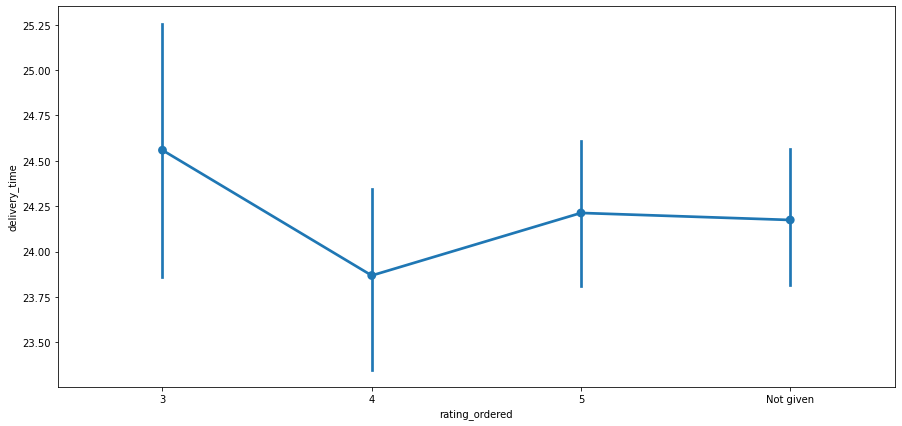

In [39]:
df['rating_ordered'] = pd.Categorical(df.rating, ordered=True, categories=['3','4','5','Not given'])

plt.figure(figsize=(15,7))
sns.pointplot(data = df, x = 'rating_ordered', y = 'delivery_time');

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   rating_ordered         1898 non-null   category
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 135.6+ KB


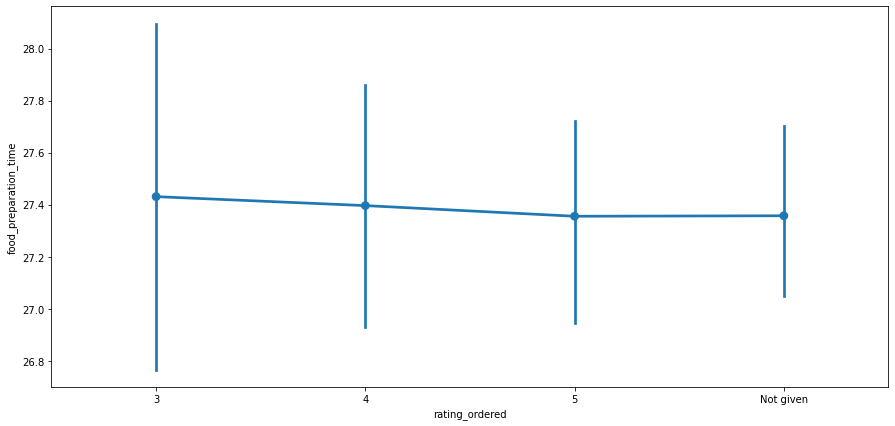

In [41]:
plt.figure(figsize=(15,7))
sns.pointplot(data = df, x = 'rating_ordered', y = 'food_preparation_time');

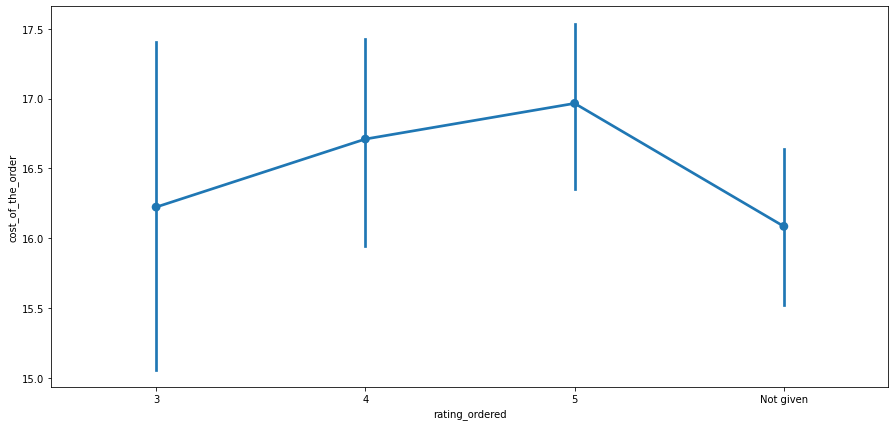

In [42]:
plt.figure(figsize=(15,7))
sns.pointplot(data = df, x = 'rating_ordered', y = 'cost_of_the_order');

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [47]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [48]:
### MY ANSWER (INCORRECT)
df['rating'] = df['rating'].replace(['Not given'],np.nan)

df['rating'] = df['rating'].astype(float)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_ordered
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,Not given
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,Not given
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,4


In [49]:
# MY ANSWER (INCORRECT)
restaurants_and_ratings = df[['restaurant_name','rating']].copy()
restaurants_and_ratings

restaurants_and_ratings.groupby(['restaurant_name'])['rating'].value_counts()

restaurant_name   rating
'wichcraft        5.0       1
12 Chairs         4.0       1
                  5.0       1
5 Napkin Burger   3.0       1
                  5.0       1
                           ..
ilili Restaurant  4.0       7
                  5.0       4
                  3.0       2
indikitch         4.0       1
                  5.0       1
Name: rating, Length: 281, dtype: int64

#### Observations: I DON'T UNDERSTAND THIS


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# function to determine the net revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_ordered,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,Not given,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,Not given,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,5,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,3,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,4,1.7385


In [53]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
total_rev

6166.303

### OBSERVATIONS
- The total revenue of the company was 6166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [54]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2)

10.54

#### Observations
- Approximately 10.54 % of the total orders took longer than 60 minutes to be delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
- The average delivery time during the week is 28.24 minutes.
- The average delivery time on weekends is 22.47 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- About 80% of the orders are for American, Japanese, Italian, and Chinese cuisines. Thus, it seems that these cuisines are quite popular with customers of FoodHub.
- Shake Shack is the most popular restaurant that has received the highest number of orders.
- Order volume increases on the weekends compared to weekdays.
Delivery time over the weekend is less compared to weekdays. This could be due to lower traffic volume over the weekend. 
-  During the week, Vietnamese, Thai, Southern, and Spanish cuisine generally have less expensive orders and lower ratings.
- Spanish cuisine has longer preparation time during the week.
- Around 39% of the orders have not been rated.

### Recommendations:
- FoodHub should look to partner with more American, Japanese, Italian, and Chinese resaurants, as these are very popular among current FoodHub users.
- FoodHub should provide promotional offers to top-rated popular restaurants like Shake Shack that serve most of the orders.
- Since order volume is high over the weekend, more delivery persons should be employed during the weekends to ensure timely delivery of orders.
- FoodHub should offer weekend promotional offers to increase food orders during the weekends.
- Customer Rating is a very important factor to gauge customer satisfaction. The company should investigate the reason behind the low count of ratings. Consider redesigning the rating page in the app to make it more interactive, to incentivize customers to rate the order.
- Around 11% of all orders have more than 60 minutes of total delivery time. FoodHub should try to minimize such instances in order to avoid customer dissatisfaction. Consider providing a reward to punctual delivery persons.

---